The visualization of fonctions time efficency

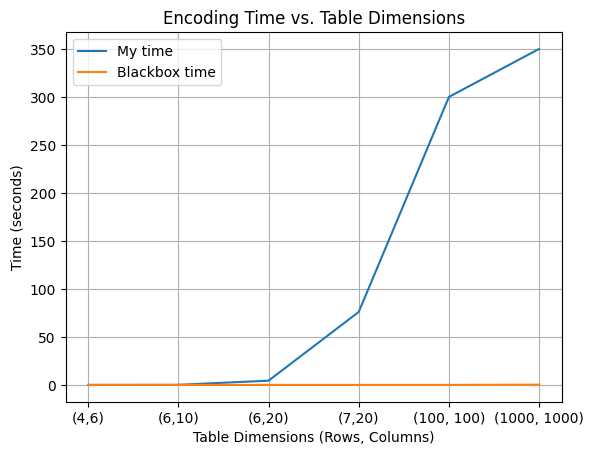

In [1]:
import time
import matplotlib.pyplot as plt
import initial_solution
import ai_code
table_dimensions_presets = [(4, 6), (6, 10), (6, 20), (7, 20)]

og_time = []
ai_time = []

for preset in table_dimensions_presets:

    start = time.time()
    initial_solution.create_table(preset[0], preset[1])
    end = time.time()

    og_time.append(end - start)


    start = time.time()
    ai_code.create_table(preset[0], preset[1])
    end = time.time()

    ai_time.append(end - start)

for_graph = []
for i in table_dimensions_presets:
    for_graph.append(f'({i[0]},{i[1]})')
plt.clf()
#It took more time than i had for these presets in initial create_table, so i ran them only for
# ai version, and appended 300 two times, as this was the longest time i spent before aborting the process
for preset in [(100, 100), (1000, 1000)]:
    start = time.time()
    ai_code.create_table(preset[0], preset[1])
    end = time.time()
    ai_time.append(end - start)

for_graph += ['(100, 100)', '(1000, 1000)']
og_time += [300, 350]

# Plot the results
plt.plot(for_graph, og_time, label='My time')
plt.plot(for_graph, ai_time, label='Blackbox time')

# Customize the plot
plt.xlabel('Table Dimensions (Rows, Columns)')
plt.ylabel('Time (seconds)')
plt.title('Encoding Time vs. Table Dimensions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [17]:
#Now let's test flatten func
'''
    >>> flatten1([1,[2]])
    [1, 2]
    >>> flatten1([1,2,[3,[4,5],6],7])
    [1, 2, 3, 4, 5, 6, 7]
    >>> flatten1(['wow', [2,[[]]], [True]])
    ['wow', 2, True]
    >>> flatten1([])
    []
    >>> flatten1([[]])
    []
    >>> flatten1(3)
    3
'''
tests = [[1,[2]], [1,2,[3,[4,5],6],7], [['wow', [2,[[]]], [True]], [], [[[[[[[[[[[[[]]]]]]]]]]]],[[[[[[[[[[]]]]]]]]]]]], ['wow', [2,[[]]], [True], [['wow', [2,[[]]], [True], [['wow', [2,[[]]], [True]]]]]]]

og_time = []
ai_time_rec= []
ai_time_cyc = []
for test in tests:

    start = time.time()
    initial_solution.flatten(test)
    end = time.time()

    og_time.append(end - start)


    start = time.time()
    ai_code.flatten_cycle(test)
    end = time.time()
    
    ai_time_cyc.append(end - start)

    start = time.time()
    ai_code.flatten_recursive(test)
    end = time.time()

    ai_time_rec.append(end - start)
print(f'Initial function average speed:{sum(og_time)/len(og_time)}')
print(og_time)
print(f'AI cycle ver. function average speed:{sum(og_time)/len(og_time)}')
print(ai_time_cyc)
print(f'AI recursive ver. function average speed:{sum(og_time)/len(og_time)}')
print(ai_time_rec)
#Як правило всюди 0.0 :(

Initial function average speed:0.0
[0.0, 0.0, 0.0, 0.0]
AI cycle ver. function average speed:0.0
[0.0, 0.0, 0.0, 0.0]
AI recursive ver. function average speed:0.0
[0.0, 0.0, 0.0, 0.0]



create_table
Промпт напряму впливає на те який підхід ШІ обере для оптимізації. На промпт ”optimize this code” я отримав такий самий код, тільки з використанням стеку. Коли я у новому чаті як промпт вказав “Take absurd to its limits and make this code fast & furious” ШІ використав цікаву стратегію використання багатопоточності для розрахунку кожного окремого списку у списку. Мені задум сподобався, і цей код як і просилося в промті, оптимізований до абсурду. З першим промптом ШІ знайшов непотрібну рекурсію та зайвий if, тому вважаю що справився добре. Також змінив назви деяких змінних для “кращої читабельності”.
З оформленням коду справляється добре, навіть імпортував додатково тайпхінти для лістів.
flatten
Зміни промптy цього разу ні на що не вплинули, проте було запропоновано цілих два оптимізованих варіанти. Перший просто змінив код, пояснивши що деякі операції можна замінити іншими, залишивши при цьому рекурсію. Інший варіант замінив рекурсію на цикл for вказавши що на великих списках або ж великій кількості вкладених списків це може прискорити функцію. Обидві версії дещо швидші за оригінальну, проте не сильно. Оформлення пункції змінив не сильно, тому що і так було все гаразд.